In [15]:
# ----------------------------------------------------------
# 1. Dataset Loading and Basic Overview
# ----------------------------------------------------------
import pandas as pd

# Load dataset
df = pd.read_csv("Dhaka Property.csv")

print("Dataset imported successfully!")

# Display basic shape of the dataset
print("Shape (rows, columns):", df.shape)

# Optional: view first few rows
# print(df.head())


Dataset imported successfully!
Shape (rows, columns): (4704, 11)


In [2]:
# ----------------------------------------------------------
# 2. List All Column Names
# ----------------------------------------------------------
# Display all column names in the dataset
print("Column Names:")
print(df.columns.tolist())


Column Names:
['Id', 'Location', 'Price', 'Type', 'No. Beds', 'No. Baths', 'Area', 'Latitude', 'Longitude', 'Region', 'Sub-region']


In [3]:
# ----------------------------------------------------------
# 3. Drop Unnecessary Columns
# ----------------------------------------------------------
# Remove columns that are not needed for analysis
df = df.drop(columns=["Id"])
print("Shape after dropping unnecessary columns:", df.shape)


Shape after dropping unnecessary columns: (4704, 10)


In [4]:
# ----------------------------------------------------------
# 4. Dataset Info and Summary Statistics
# ----------------------------------------------------------
import matplotlib.pyplot as plt  # For plotting and data visualization
import seaborn as sns            # For statistical data visualization (heatmaps, pairplots)
import numpy as np               # For numerical operations (arrays, math functions)

# Display dataset information
print("\nColumn Info:")
print(df.info())  # Column names, data types, non-null counts

# Check for missing values in each column
print("\nMissing Values per Column:\n", df.isnull().sum())

# Display summary statistics: mean, std, min, max, quartiles
display(df.describe())



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    4704 non-null   object 
 1   Price       4704 non-null   int64  
 2   Type        4704 non-null   object 
 3   No. Beds    4500 non-null   float64
 4   No. Baths   4500 non-null   float64
 5   Area        4704 non-null   int64  
 6   Latitude    4704 non-null   float64
 7   Longitude   4704 non-null   float64
 8   Region      4704 non-null   object 
 9   Sub-region  4680 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 367.6+ KB
None

Missing Values per Column:
 Location        0
Price           0
Type            0
No. Beds      204
No. Baths     204
Area            0
Latitude        0
Longitude       0
Region          0
Sub-region     24
dtype: int64


,Price,No. Beds,No. Baths,Area,Latitude,Longitude
count,4.704000e+03,4500.000000,4500.000000,4704.000000,4704.000000,4704.000000
mean,1.001724e+07,2.981333,2.830889,1460.678146,23.780563,90.391496
std,9.787789e+06,1.456064,0.862690,1067.267396,0.047919,0.035239
min,5.000000e+05,1.000000,1.000000,320.000000,23.644560,90.246430
25%,5.000000e+06,3.000000,2.000000,1050.000000,23.752610,90.365470
50%,7.000000e+06,3.000000,3.000000,1275.000000,23.770260,90.392800
75%,1.080000e+07,3.000000,3.000000,1550.000000,23.812230,90.421790
max,8.131280e+07,46.000000,10.000000,43344.000000,23.893380,90.480410


In [5]:
# ----------------------------------------------------------
# 5. Drop Rows with Missing Values
# ----------------------------------------------------------
# Remove any row that contains missing values
df = df.dropna()
print("Shape after dropping rows with missing values:", df.shape)


Shape after dropping rows with missing values: (4491, 10)


In [6]:
# ----------------------------------------------------------
# 6. Filter Dataset for Apartments Only
# ----------------------------------------------------------
# Drop rows where 'Type' is not 'Apartment' (e.g., plots or other property types)
df = df.drop(df[df['Type'] != 'Apartment'].index)

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

print(f"Filtered dataset shape: {df.shape}")


Filtered dataset shape: (4458, 10)


In [7]:
# ----------------------------------------------------------
# 7. Identify Categorical Columns and Unique Value Counts
# ----------------------------------------------------------
# Select categorical columns to decide encoding strategy
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print categorical columns and their number of unique values
print("Categorical Columns and Number of Unique Values:\n")
for col in categorical_cols:
    print(f"📌 Column: {col} → {df[col].nunique()} unique values")


Categorical Columns and Number of Unique Values:

📌 Column: Location → 481 unique values
📌 Column: Type → 1 unique values
📌 Column: Region → 65 unique values
📌 Column: Sub-region → 415 unique values


In [8]:
# ----------------------------------------------------------
# 8. Label Encode Categorical Features
# ----------------------------------------------------------
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Label Encoding applied successfully!")
print("Encoded columns:", categorical_cols.tolist())


✅ Label Encoding applied successfully!
Encoded columns: ['Location', 'Type', 'Region', 'Sub-region']


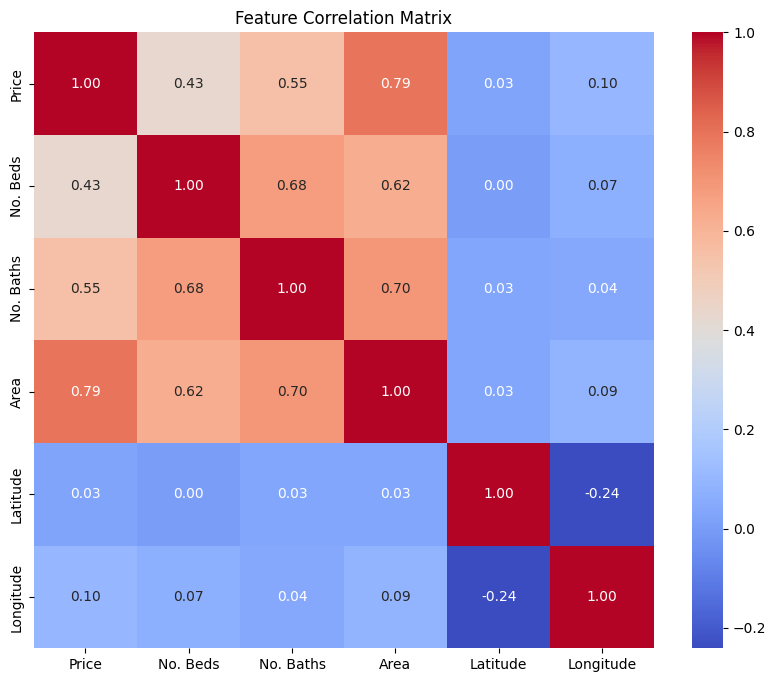

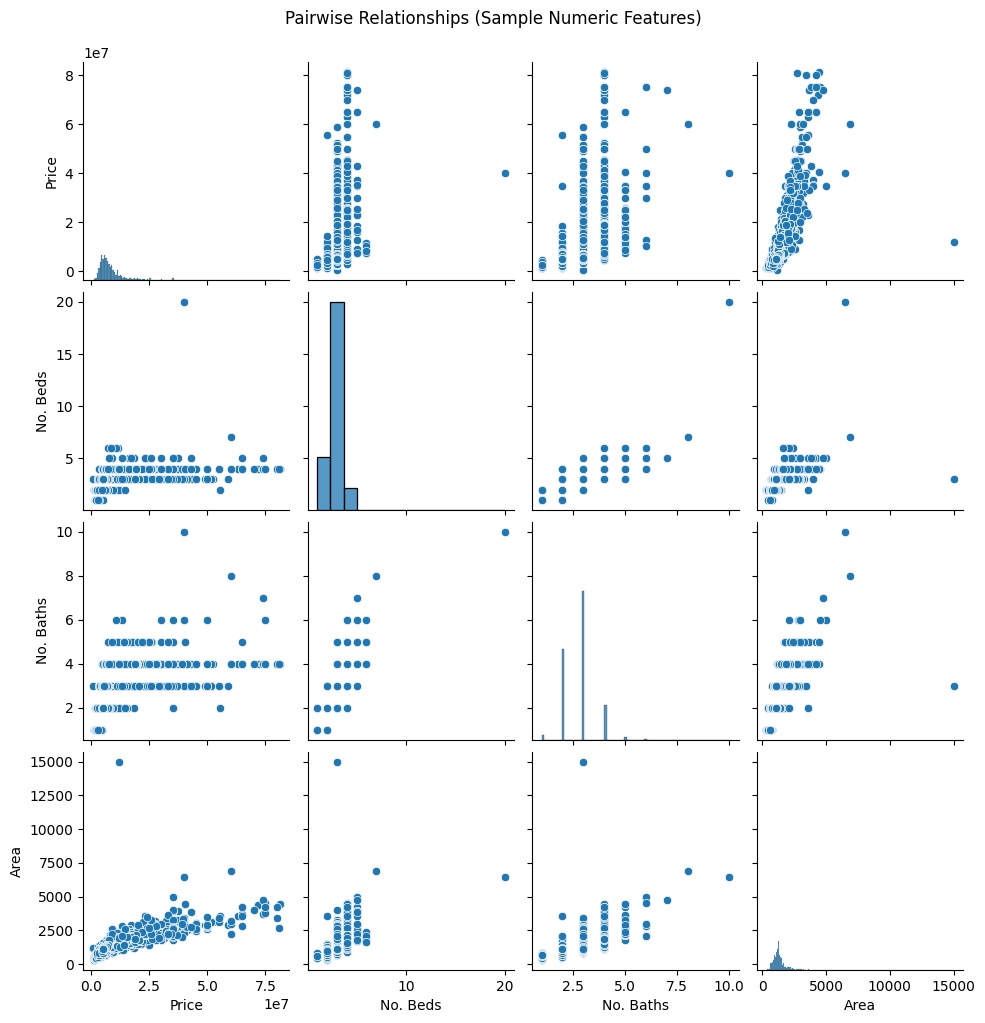

In [9]:
# ----------------------------------------------------------
# 9. Correlation Heatmap and Pairplot for Numerical Features
# ----------------------------------------------------------
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# ---- Optional: Pairplot for selected numeric columns ----
# Select up to 4 numeric columns to visualize pairwise relationships
numeric_cols = numeric_df.columns[:4]  # first 4 numeric columns
sns.pairplot(numeric_df[numeric_cols])
plt.suptitle("Pairwise Relationships (Sample Numeric Features)", y=1.02)
plt.show()


In [10]:
# ----------------------------------------------------------
# 10. Feature and Target Selection with Train/Test Split
# ----------------------------------------------------------
from sklearn.model_selection import train_test_split  # For splitting dataset into train/test sets

# Define feature matrix X (all columns except target 'Price')
X = df.drop("Price", axis=1)

# Define target vector y (dependent variable - house price)
y = df["Price"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state ensures reproducibility
)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

#print(y.head)
#print(X.head)


Training set size: (3566, 9)
Testing set size: (892, 9)


In [11]:
# ----------------------------------------------------------
# 11. Model Training: Linear Regression
# ----------------------------------------------------------
from sklearn.linear_model import LinearRegression  # Linear Regression model

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Train (fit) model on training data
lin_reg.fit(X_train, y_train)

# Predict target values on test set
y_pred_lin = lin_reg.predict(X_test)

print("✅ Linear Regression model trained successfully!")


✅ Linear Regression model trained successfully!


In [12]:
# ----------------------------------------------------------
# 12. Model Training: Decision Tree Regression
# ----------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regression model

# Initialize Decision Tree Regressor with limited depth to avoid overfitting
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train Decision Tree model
tree_reg.fit(X_train, y_train)

# Predict target values on test set
y_pred_tree = tree_reg.predict(X_test)

print("✅ Decision Tree Regression model trained successfully!")


✅ Decision Tree Regression model trained successfully!


In [13]:
# ----------------------------------------------------------
# 13. Model Evaluation Metrics
# ----------------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics

# Define a helper function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Performance ===")
    print("MAE  :", round(mean_absolute_error(y_true, y_pred), 3))   # Mean Absolute Error
    print("MSE  :", round(mean_squared_error(y_true, y_pred), 3))    # Mean Squared Error
    print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))  # Root Mean Squared Error
    print("R² Score:", round(r2_score(y_true, y_pred), 3))           # R-squared (goodness of fit)

# Evaluate both models
evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree Regression")



=== Linear Regression Performance ===
MAE  : 2420252.494
MSE  : 19907335539230.49
RMSE : 4461763.725
R² Score: 0.703

=== Decision Tree Regression Performance ===
MAE  : 1836690.944
MSE  : 10505410214235.564
RMSE : 3241205.056
R² Score: 0.843


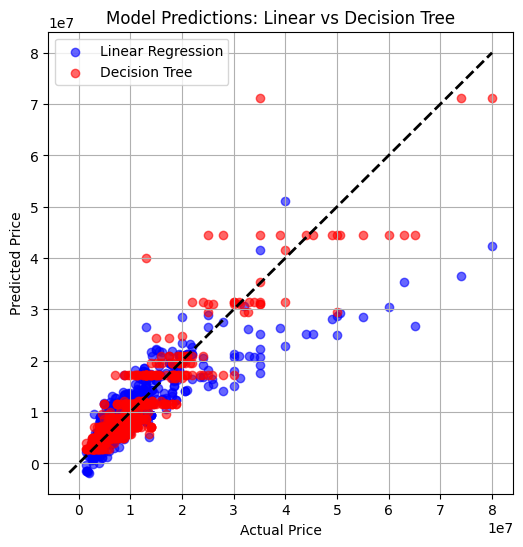

In [14]:
# ----------------------------------------------------------
# 14. Visualization of Model Predictions
# ----------------------------------------------------------
import matplotlib.pyplot as plt

# Create scatter plot comparing actual vs. predicted values for both models
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_tree, color='red', label='Decision Tree', alpha=0.6)

# Add reference line (perfect prediction)
min_val = min(y_test.min(), y_pred_lin.min(), y_pred_tree.min())
max_val = max(y_test.max(), y_pred_lin.max(), y_pred_tree.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Dashed diagonal line for ideal prediction

# Label axes and add legend
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Predictions: Linear vs Decision Tree")
plt.legend()
plt.grid(True)
plt.show()
